In [1]:
from metrics import *
import torch
from torch_geometric.datasets import Planetoid
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import torch.nn.functional as F
import random
import matplotlib.pyplot as plt
import numpy as np
from time import time
from tqdm import tqdm
from utils import *
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
import umap
import trimap

random_state = 0
random.seed(0)
torch.manual_seed(0)

print("Cuda available?", torch.cuda.is_available())
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

Cuda available? True


In [2]:
dataset_name = "Cora"
original_gnn = "GNN"
algorithm_name = "TSNE"

dataset = Planetoid(root=".", name="Cora")
data = dataset[0].to(device)


X = dataset[0].x.cpu().detach().numpy()
y = dataset[0].y.cpu().numpy()


In [3]:
model = GCN(input_dim=dataset.num_node_features, hidden_dim=64, output_dim=16).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

train_loop(200, model, optimizer, data)

# Extract features with the trained GNN
model.eval()
with torch.no_grad():
    gnn_output = model(data)

# Move the features to CPU for t-SNE
gnn_output = gnn_output.cpu().numpy()

Calculating d_hd
dataset_name TSNE-euclidean
Calculating d_hd
dataset_name TSNE-l1
Calculating d_hd
dataset_name TSNE-l2
Calculating d_hd
dataset_name TSNE-manhattan
Calculating d_hd
dataset_name TSNE-cosine
Finished.


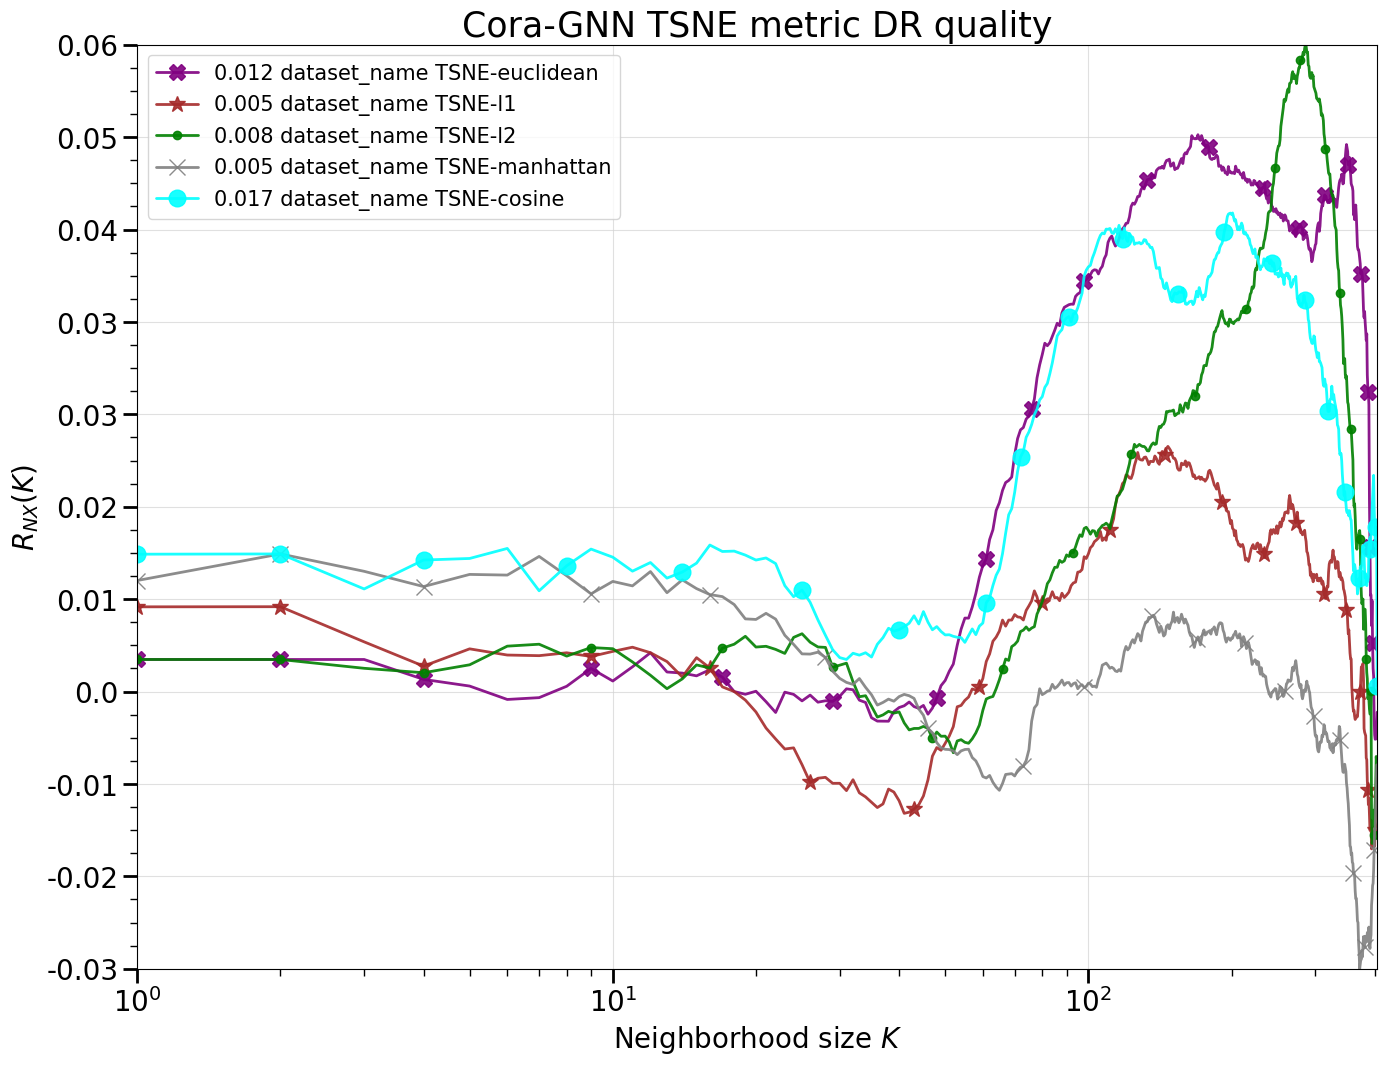

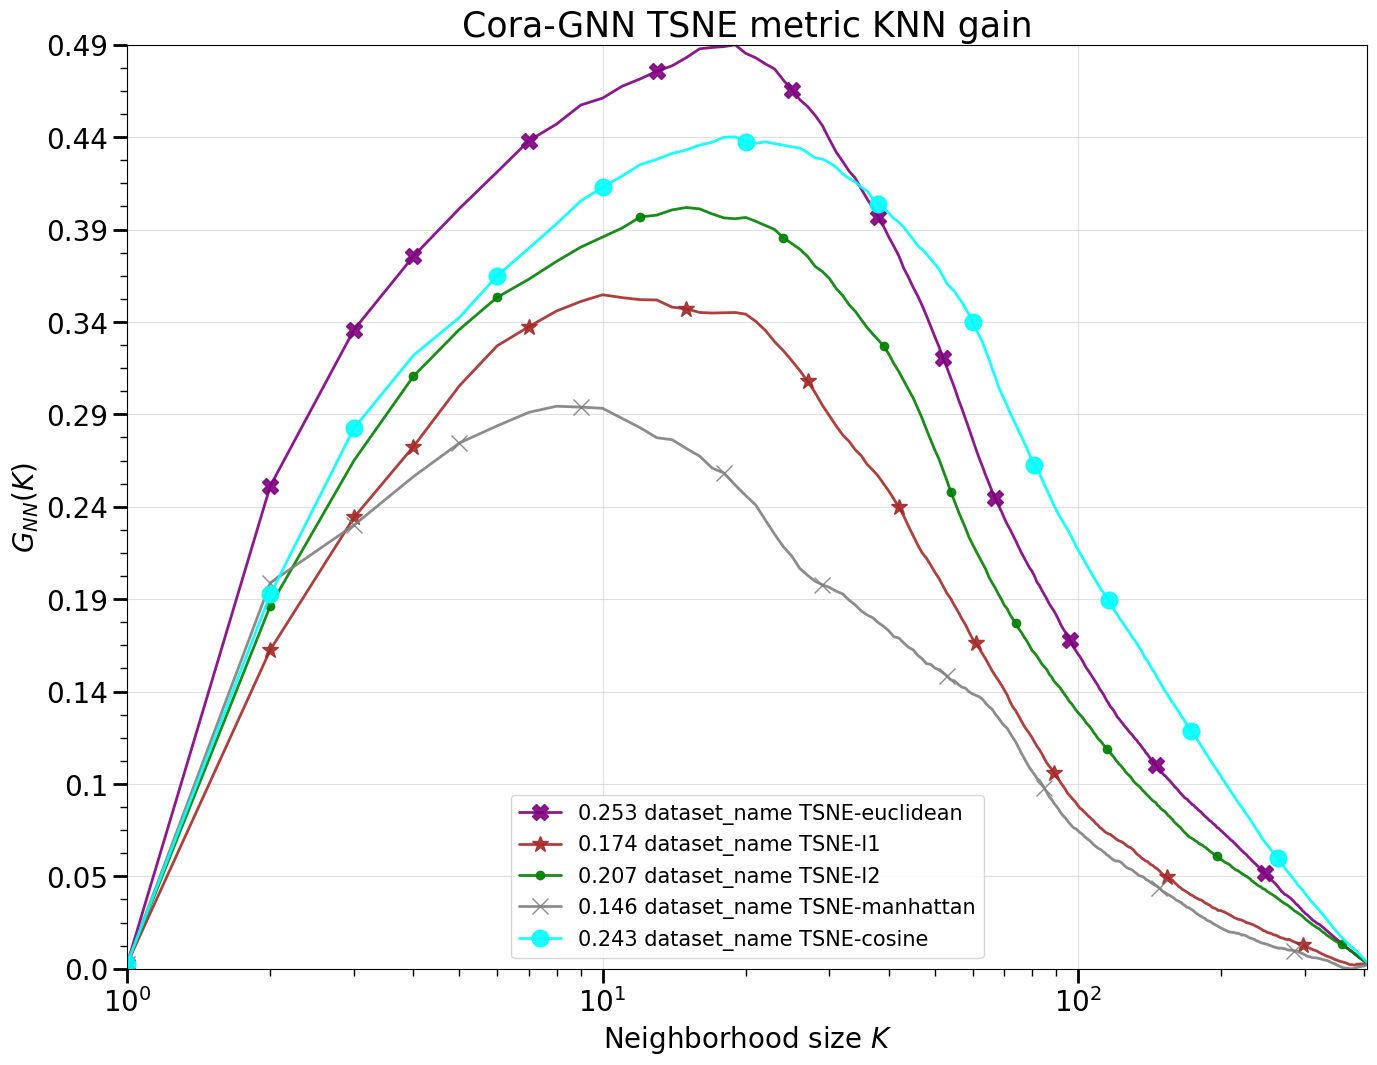

In [4]:
local_metrics = LocalMetric()

for dist in ['euclidean', 'l1', 'l2', 'manhattan', 'cosine']:
    tsne = TSNE(n_components=2, random_state=random_state, metric=dist)
    tsne_results = tsne.fit_transform(gnn_output)

    local_metrics.calculate_knn_gain_and_dr_quality(
        X_lds=tsne_results,
        X_hds=X,
        labels=y,
        method_name="{} {}".format("dataset_name", f"{algorithm_name}-{dist}"),
    )

local_metrics.visualize(f"{dataset_name}-{original_gnn} TSNE metric")

Calculating d_hd
Cora TSNE-300
Calculating d_hd
Cora TSNE-500
Calculating d_hd
Cora TSNE-1000
Calculating d_hd
Cora TSNE-2000
Calculating d_hd
Cora TSNE-5000
Finished.


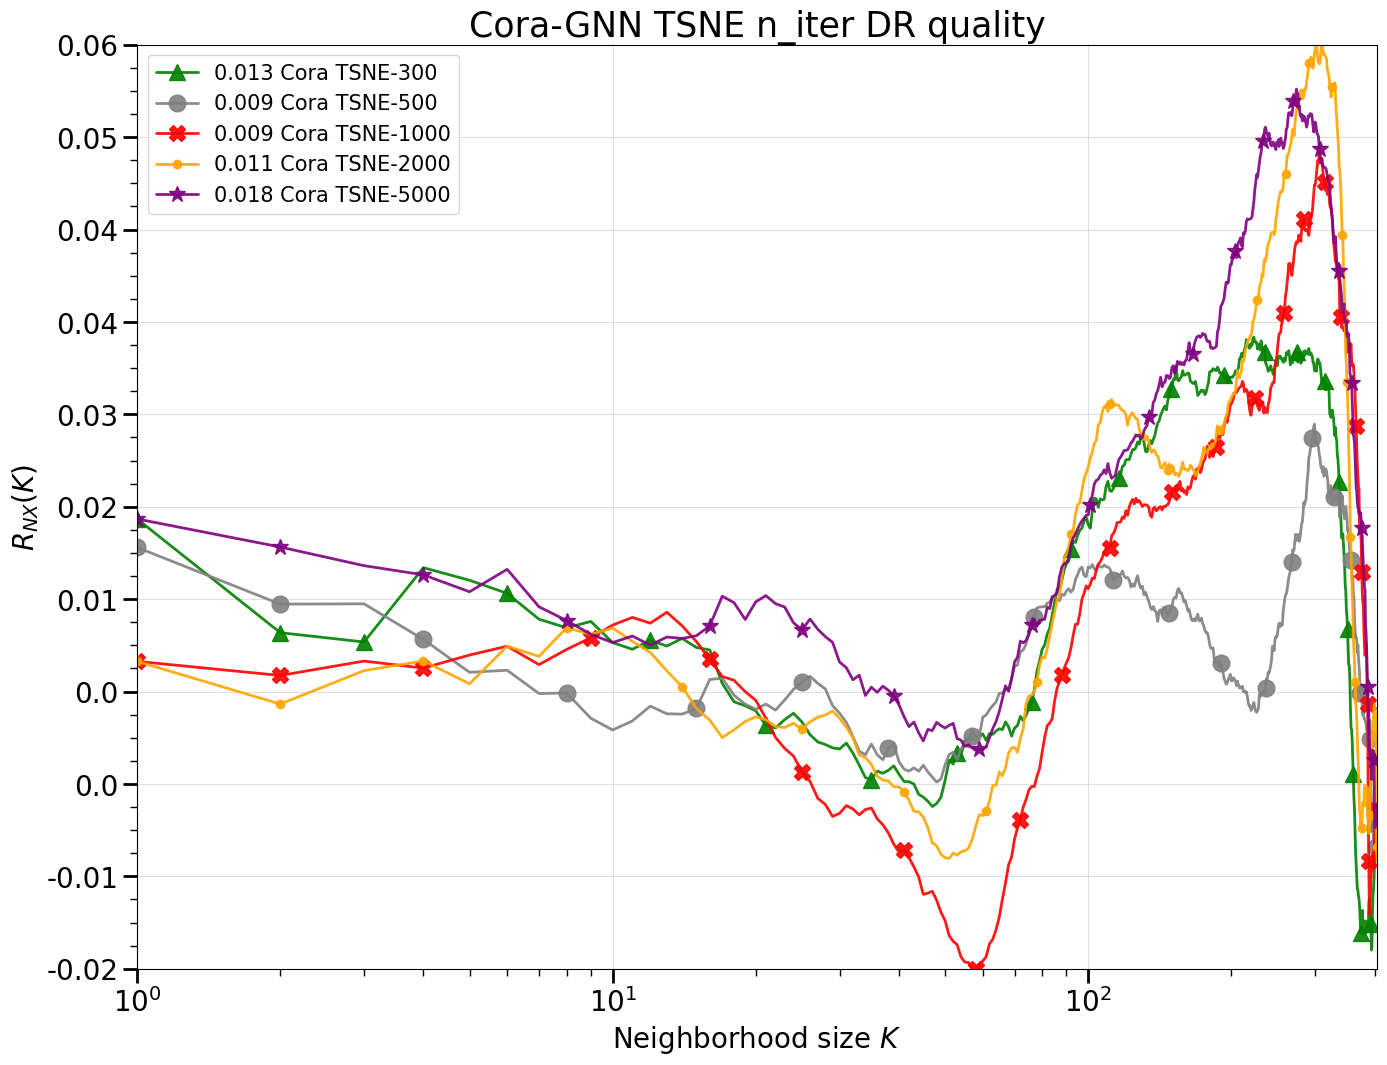

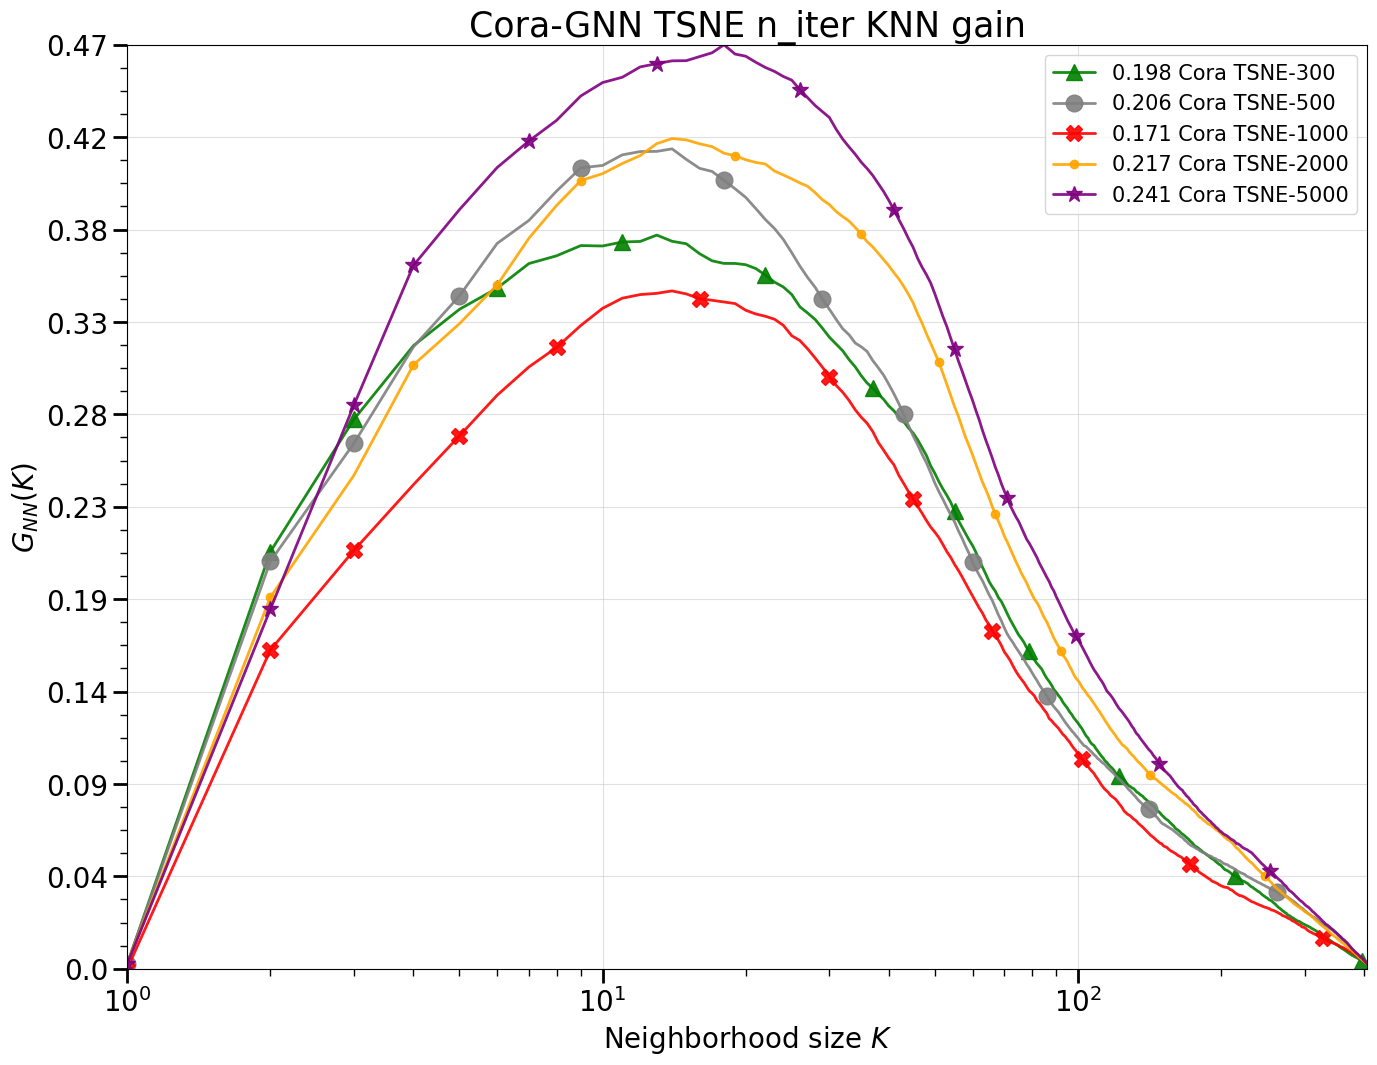

In [5]:
local_metrics = LocalMetric()

for n_iter in [300, 500, 1000, 2000, 5000]:
    tsne = TSNE(n_components=2, random_state=random_state, n_iter=n_iter)
    tsne_results = tsne.fit_transform(gnn_output)

    local_metrics.calculate_knn_gain_and_dr_quality(
        X_lds=tsne_results,
        X_hds=X,
        labels=y,
        method_name="{} {}".format("Cora", f"{algorithm_name}-{n_iter}"),
    )

local_metrics.visualize(f"{dataset_name}-{original_gnn} TSNE n_iter")

Calculating d_hd
Cora TSNE-10
Calculating d_hd
Cora TSNE-100
Calculating d_hd
Cora TSNE-500
Calculating d_hd
Cora TSNE-1000
Finished.


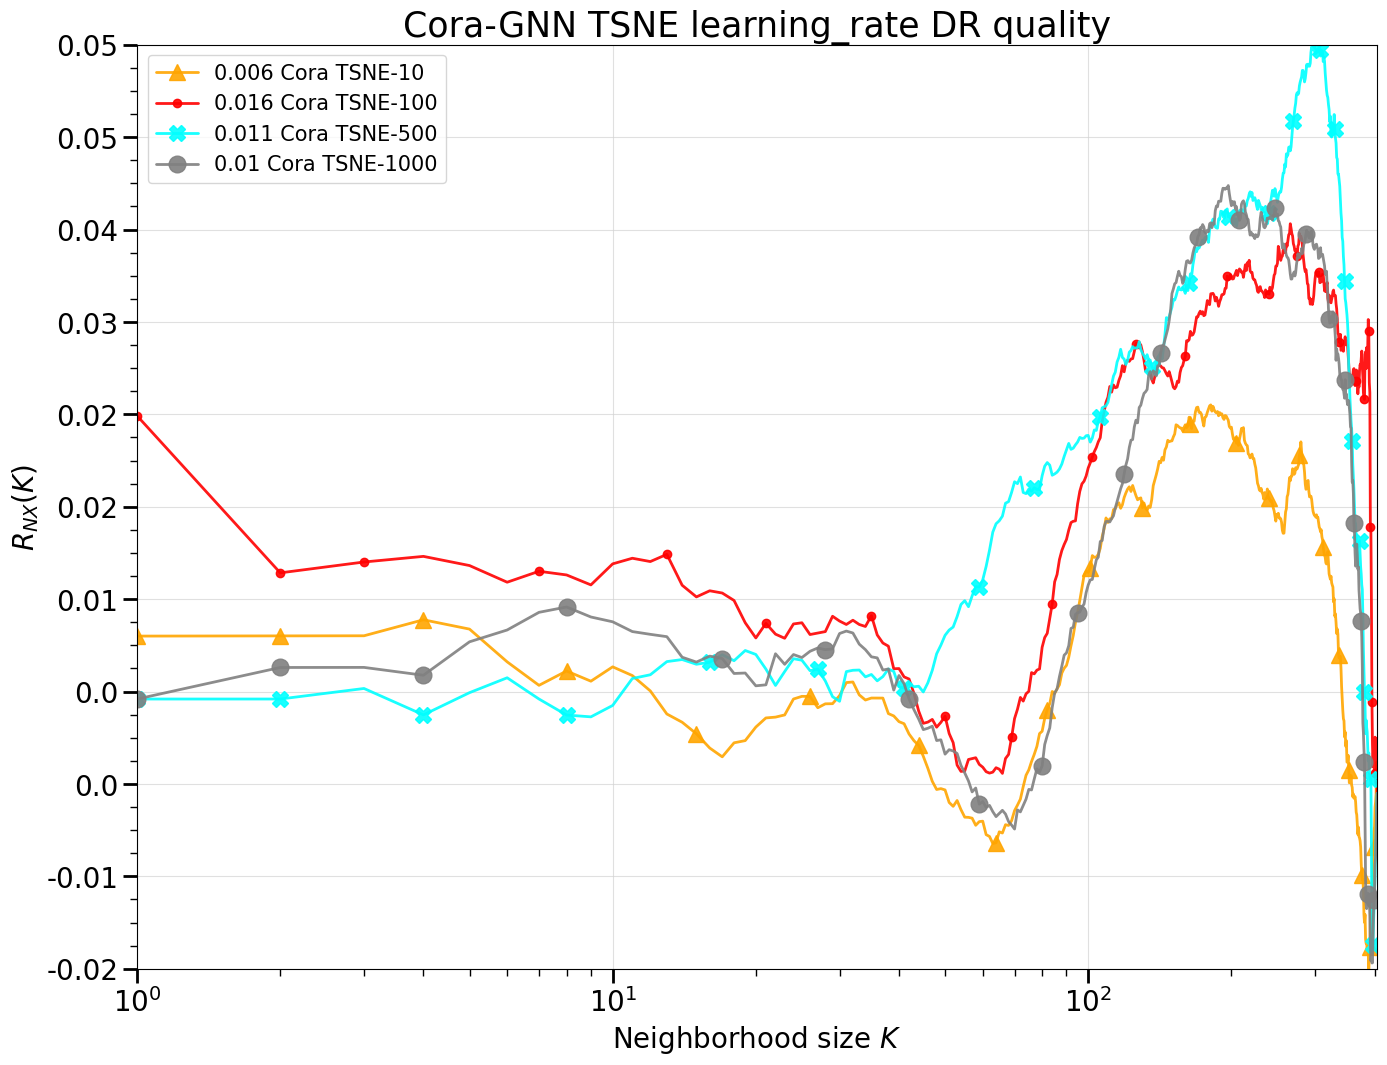

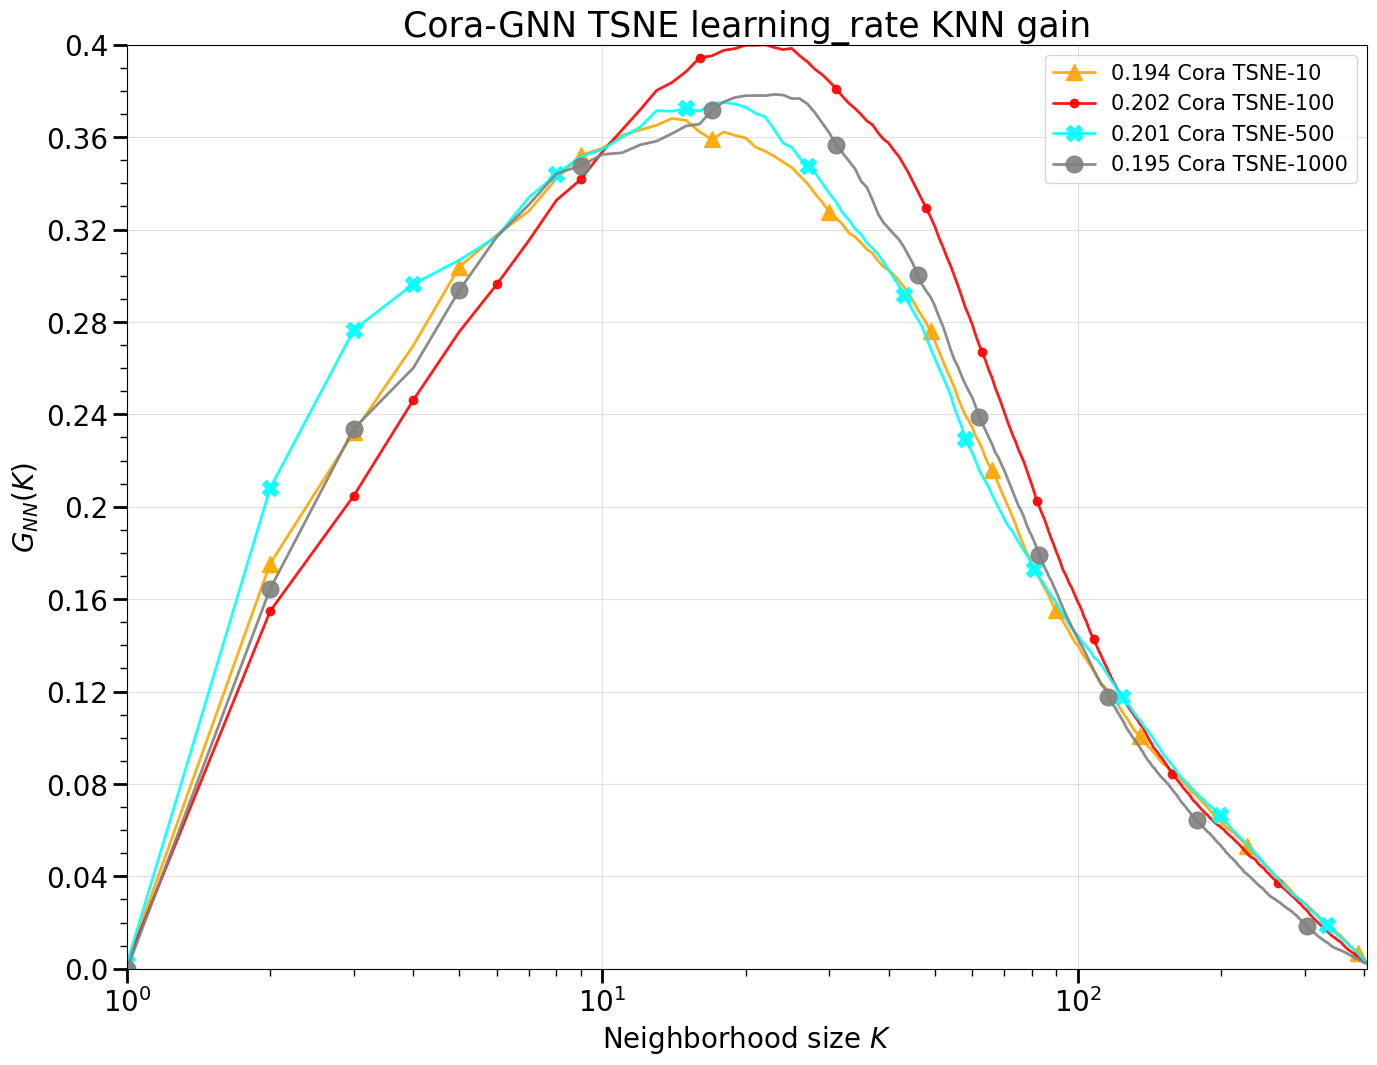

In [6]:
local_metrics = LocalMetric()

for learning_rate in [10, 100, 500, 1000]:
    tsne = TSNE(n_components=2, random_state=random_state, learning_rate=learning_rate)
    tsne_results = tsne.fit_transform(gnn_output)

    local_metrics.calculate_knn_gain_and_dr_quality(
        X_lds=tsne_results,
        X_hds=X,
        labels=y,
        method_name="{} {}".format("Cora", f"{algorithm_name}-{learning_rate}"),
    )

local_metrics.visualize(f"{dataset_name}-{original_gnn} TSNE learning_rate")

Calculating d_hd
Cora TSNE-5
Calculating d_hd
Cora TSNE-30
Calculating d_hd
Cora TSNE-50
Calculating d_hd
Cora TSNE-100
Finished.


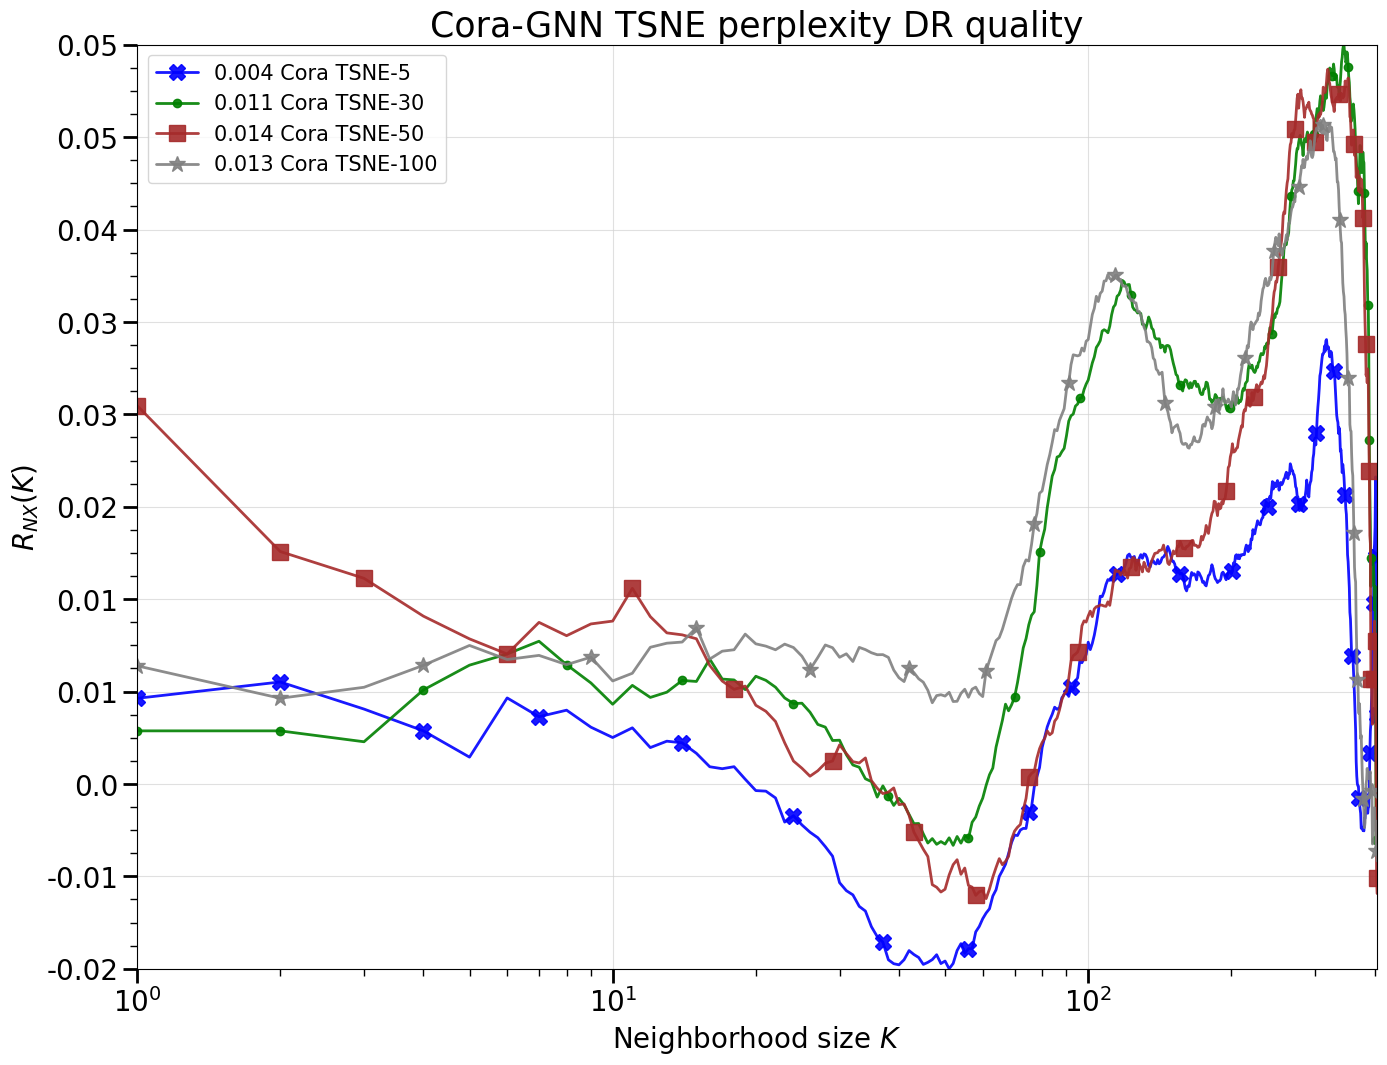

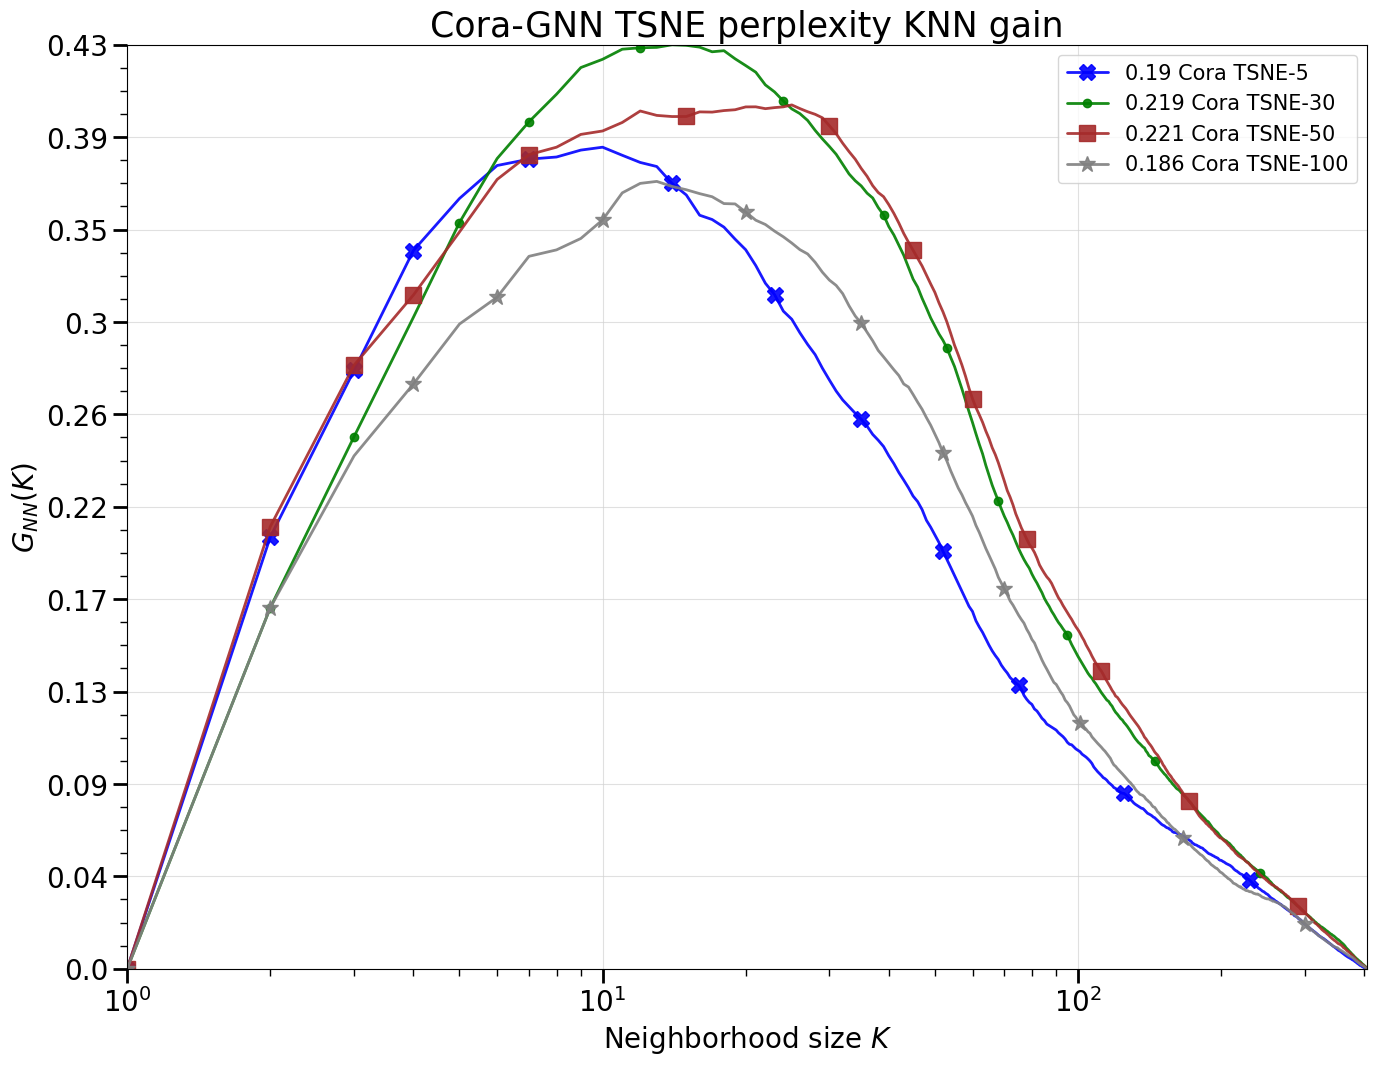

In [7]:
local_metrics = LocalMetric()

for perplexity in [5, 30, 50, 100]:
    tsne = TSNE(n_components=2, random_state=random_state, perplexity=perplexity)
    tsne_results = tsne.fit_transform(gnn_output)

    local_metrics.calculate_knn_gain_and_dr_quality(
        X_lds=tsne_results,
        X_hds=X,
        labels=y,
        method_name="{} {}".format("Cora", f"{algorithm_name}-{perplexity}"),
    )

local_metrics.visualize(f"{dataset_name}-{original_gnn} TSNE perplexity")